## Link to Medium: https://johnnygeng.medium.com/data-analysis-and-predictive-models-of-1000-cameras-dataset-3414a409cf02 <br>
## Link to Github Page: https://github.com/Johnny-Geng/Comprehensive-Machine-Learning


# Phase 1: Data Exploration and Data Wrangling

1-1 **Import the dataset**<br>
Source: https://www.kaggle.com/crawford/1000-cameras-dataset/?select=camera_dataset.csv

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn 
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
df = pd.read_csv("camera_dataset.csv")

1-2 **Explore the shape and structure of the dataframes**

In [ ]:
df.info

<bound method DataFrame.info of                        Model  Release date  Max resolution  Low resolution  \
0           Agfa ePhoto 1280          1997          1024.0           640.0   
1           Agfa ePhoto 1680          1998          1280.0           640.0   
2           Agfa ePhoto CL18          2000           640.0             0.0   
3           Agfa ePhoto CL30          1999          1152.0           640.0   
4     Agfa ePhoto CL30 Clik!          1999          1152.0           640.0   
...                      ...           ...             ...             ...   
1033         Toshiba PDR-M65          2001          2048.0          1024.0   
1034         Toshiba PDR-M70          2000          2048.0          1024.0   
1035         Toshiba PDR-M71          2001          2048.0          1024.0   
1036         Toshiba PDR-M81          2001          2400.0          1200.0   
1037         Toshiba PDR-T10          2002          1600.0           800.0   

      Effective pixels  Zoom wi

1-3 **Overview of the dataset**

In [ ]:
df.head()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0


1-4 **Explore the variable types**

In [ ]:
df.dtypes

Model                       object
Release date                 int64
Max resolution             float64
Low resolution             float64
Effective pixels           float64
Zoom wide (W)              float64
Zoom tele (T)              float64
Normal focus range         float64
Macro focus range          float64
Storage included           float64
Weight (inc. batteries)    float64
Dimensions                 float64
Price                      float64
dtype: object



> Except the "Model" variable, all the other variables in the dataset appear to be numerical variables.



1-5 **Handling missing values**

In [ ]:
df.isnull().sum()

Model                      0
Release date               0
Max resolution             0
Low resolution             0
Effective pixels           0
Zoom wide (W)              0
Zoom tele (T)              0
Normal focus range         0
Macro focus range          1
Storage included           2
Weight (inc. batteries)    2
Dimensions                 2
Price                      0
dtype: int64



> There are only a few missing values in four variables, so let's drop them for better analysis later.



In [ ]:
df.dropna(inplace=True)

I also notice that some values in the "Weight (inc. batteries)" variables appear to be zero, which does not make sense, as a camera must have some weight. So, I will drop these misleading entries of data.

In [ ]:
df = df[df['Weight (inc. batteries)'] != 0]

1-6 **Clean the data** <br>
Knowing the specific model type of camera does not necessarily help modeling the dataset later, as other parameters of the camera essentially define the model. However, the brand of a camera (indicated by the first word in the "Model" variable) may be a valuable variable to look into. Thus, I decide to transform the "Model" variable to a "Brand" variable for better analysis later.

In [ ]:
df['Brand'] = ""
df['Brand'] = df.Model.str.split().str.get(0)
df.drop(columns=['Model'],inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

It also does not make sense for the "Release date" variable to be an integer type for modeling, so I convert it to string (essentially treating it as a categorical variable) for better analysis later.

In [ ]:
df['Release date'] = df['Release date'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1-7 **Final Look at the cleaned dataset**

In [ ]:
df.reset_index(drop=True,inplace=True)
df.head()

,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price,Brand
0,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0,Agfa
1,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0,Agfa
2,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0,Agfa
3,2001,1600.0,640.0,1.0,51.0,51.0,50.0,20.0,8.0,270.0,119.0,179.0,Agfa
4,1997,640.0,0.0,0.0,42.0,42.0,70.0,3.0,2.0,320.0,93.0,149.0,Canon




> The dataset looks good now!



# Phase 2: Choosing the Right Type of Model

2-1 **Determine the target variable for modeling**



*   2-1-1 Statistical Summary



In [ ]:
display(df.describe())

,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
count,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000
mean,2480.902463,1783.568473,4.607882,32.927094,121.690640,44.126108,7.793103,17.482759,325.870936,106.500000,457.347783
std,751.316066,824.970568,2.819686,10.380560,93.968305,23.842842,8.088792,27.212573,258.965633,21.817119,765.608174
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,14.000000
25%,2048.000000,1136.000000,3.000000,35.000000,96.000000,30.000000,3.000000,8.000000,180.000000,92.000000,149.000000
50%,2560.000000,2048.000000,4.000000,36.000000,108.000000,50.000000,6.000000,16.000000,230.000000,102.000000,199.000000
75%,3072.000000,2560.000000,7.000000,38.000000,117.000000,60.000000,10.000000,20.500000,350.000000,116.000000,399.000000
max,5616.000000,4992.000000,21.000000,52.000000,518.000000,120.000000,85.000000,450.000000,1860.000000,240.000000,7999.000000




*   2-1-2 Histograms of Potentially Interesting Variables



Text(0.5, 1.0, 'The Distribution of Camera Price')

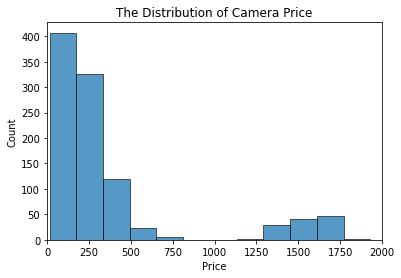

In [ ]:
# Price
sn.histplot(x='Price',data=df, bins=50)
plt.xlim(0,2000)
plt.title("The Distribution of Camera Price")

Text(0.5, 1.0, 'The Distribution of the Weight of Cameras')

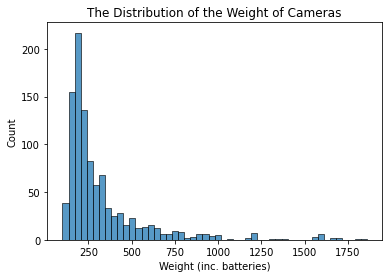

In [ ]:
# Weight
sn.histplot(x='Weight (inc. batteries)',data=df, bins=50)
plt.title("The Distribution of the Weight of Cameras")



*   2-1-3 Correlation between numerical attributes



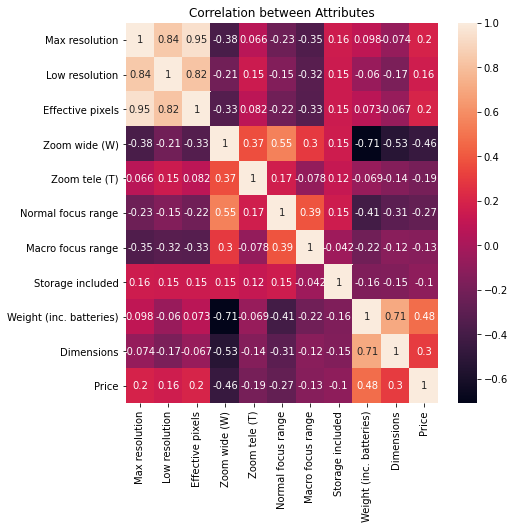

In [ ]:
Corr=df.corr(method='pearson')
plt.subplots(figsize=(7,7))
sn.heatmap(Corr, annot=True)
plt.title('Correlation between Attributes')
plt.show()



> It appears that most numerical variables in this dataset have fairly low correlations with others, with 2 exceptions: resolution vs. effective pixels and dimensions vs. weight. However, these two relationships are not so interesting to explore. Thus, I decide to look more into the categorical variables.





*   2-1-4 Finalize the target variable<br><br>
    Since there isn't anything interesting about the release year of the camera, I ultimately decide to choose the "Brand" variable as the target variable for my model. Essentially, my model will take in all other attributes of a camera to predict its brand.






*   2-1-5 The Distribution of "Brand" variable



Brand
Agfa           4
Canon        115
Casio         63
Contax         1
Epson         12
Fujifilm      98
HP            44
JVC            2
Kodak        102
Kyocera       15
Leica         11
Nikon         90
Olympus      121
Panasonic     55
Pentax        67
Ricoh         26
Samsung       47
Sanyo          8
Sigma          4
Sony         113
Toshiba       17
Name: Count, dtype: int64

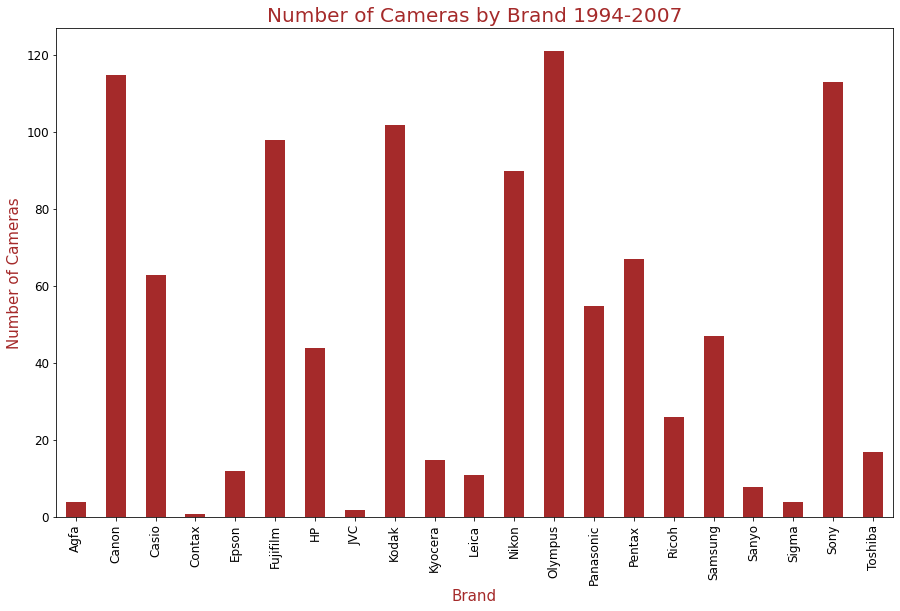

In [ ]:
df_brand_count = df.groupby('Brand').count()
df_brand_count['Count'] = ""
df_brand_count['Count'] = df.groupby('Brand').count()
display(df_brand_count['Count'])
df_brand_count['Count'].plot(kind='bar', figsize=(15,9),fontsize = 12, color= 'brown')
plt.xlabel('Brand', color= 'brown', fontsize = 15)
plt.ylabel('Number of Cameras', color= 'brown', fontsize = 15)
plt.title('Number of Cameras by Brand 1994-2007', 
          color= 'brown', fontsize = 20)
plt.show()







*   2-1-6 Remove Insignificant Data <br>Agfa, Contax, JVC, and Sigma all have too little amount of cameras to be considered significant (Counts <= 4). Thus, let's remove the data of these four brands so to reduce biases of our predicted model later. 





In [ ]:
df.drop(df[(df['Brand'] == 'Agfa')].index, inplace=True)
df.drop(df[(df['Brand'] == 'Contax')].index, inplace=True)
df.drop(df[(df['Brand'] == 'JVC')].index, inplace=True)
df.drop(df[(df['Brand'] == 'Sigma')].index, inplace=True)
df.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


2-2 **Type of Models**

Since my target variable "Brand" is a categorical variable, modeling method such as linear regression clearly is not applicable. Further, since my my target variable "Brand" is not a binary variable, logistical regression is also not appropriate. Thus, I will focus on training my model using methods that are suitable for classification.

# Phase 3: Prepare the Data for Modeling

3-1 **Convert categorical variables into dummy variables**

In [ ]:
# reorder the dataframe such that target variable is at the first column
# make it easier for data slicing later
cols = df.columns.to_list()
cols = cols[-1:] + cols[:-1]
df = df[cols]

# convert the only categorical variable: 'Release date' to dummy variable
df = pd.get_dummies(df, columns=['Release date'])

3-2 **Normalize the dataset**

Ranges of the features of the dataset are not the same. This may cause a problem. A small change in a feature might not affect the other. To address this problem, I will normalize the ranges of the features to a uniform range 0-1.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
cols = ['Max resolution', 'Low resolution', 'Effective pixels',
       'Zoom wide (W)', 'Zoom tele (T)', 'Normal focus range',
       'Macro focus range', 'Storage included', 'Weight (inc. batteries)',
       'Dimensions', 'Price'] 
newData = pd.DataFrame(df, columns=['Brand'])
normalizedData = pd.DataFrame(df, columns=cols)
normalizedData = scaler.fit_transform(normalizedData)
normalizedData = pd.DataFrame(normalizedData, columns=cols)
newData = newData.join(normalizedData)
df.drop(columns=['Brand'],inplace=True)
df.drop(columns=cols, inplace=True)
df = newData.join(df)
display(df.head())

,Brand,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price,Release date_1994,Release date_1995,Release date_1996,Release date_1997,Release date_1998,Release date_1999,Release date_2000,Release date_2001,Release date_2002,Release date_2003,Release date_2004,Release date_2005,Release date_2006,Release date_2007
0,Canon,0.113960,0.000000,0.000000,0.807692,0.081081,0.583333,0.035294,0.004444,0.125000,0.387500,0.010961,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Canon,0.148148,0.128205,0.000000,0.961538,0.096525,0.333333,0.117647,0.002222,0.204545,0.666667,0.009701,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Canon,0.227920,0.205128,0.047619,0.673077,0.202703,0.633333,0.188235,0.017778,0.156250,0.458333,0.009701,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,Canon,0.227920,0.205128,0.047619,0.750000,0.075290,0.166667,0.058824,0.017778,0.071023,0.458333,0.009701,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,Canon,0.284900,0.205128,0.047619,0.673077,0.202703,0.633333,0.188235,0.017778,0.156250,0.458333,0.009701,0,0,0,0,0,0,0,1,0,0,0,0,0,0




> The numerical attributes have now with a normalized range from 0 to 1 successfully.



3-3 **Partition the data into training and testing sets (70/30)**

In [ ]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, 1:]
y = df.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021, stratify=y)



> Since the distribution of brand is unequal and skewed, I will do the following to preserve the brand proportion within the training and testing set to better form the model:

```
stratify=y
```






3-4 **Confirm the shape of training and testing sets are in 70:30 proportion**

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(702, 25)
(302, 25)
(702,)
(302,)


# Phase 4.1: Decision Tree Modeling

4.1-1 **Fit the training data to a classification tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=2021)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2021, splitter='best')

4.1-2 **Visualize the confusion matrix**

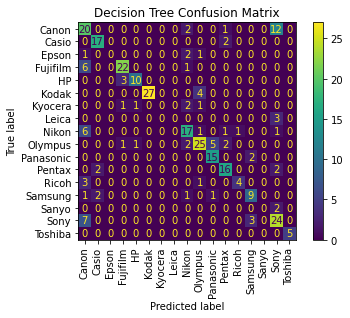

In [ ]:
from sklearn import metrics

metrics.plot_confusion_matrix(dt, X_test, y_test)
plt.xticks(rotation=90)
plt.title("Decision Tree Confusion Matrix")
plt.show()

4.1-3 **Print the accuracy score on the test partition**

In [ ]:
y_pred = dt.predict(X_test)
print('Testing Accuracy =', metrics.accuracy_score(y_test, y_pred))

Testing Accuracy = 0.6986754966887417


4.1-4 **Show the classification tree**

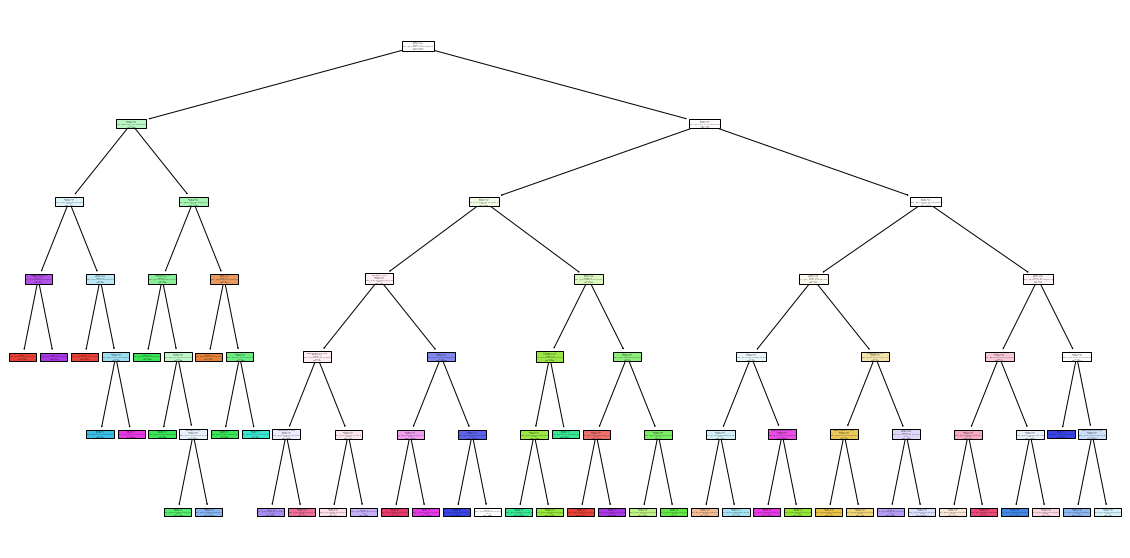

In [ ]:
from sklearn import tree
plt.figure(figsize=(20,10))
fn = X.columns
cn = y.unique()
Tree = tree.plot_tree(dt, feature_names=fn, class_names=cn, filled=True)
plt.show()

4.1-5 **Find the most important features in the decision tree for determining toxicity.**

In [ ]:
imp=pd.DataFrame(zip(X_train.columns, dt.feature_importances_), columns=['Feature','Importance'])
imp.sort_values(by='Importance', ascending=False, inplace=True)
print(imp.head())

                    Feature  Importance
10                    Price    0.811557
5        Normal focus range    0.050313
8   Weight (inc. batteries)    0.040492
4             Zoom tele (T)    0.029617
7          Storage included    0.022297


4.1-6 **Model Optimization: cross validation / regularization & prunnning**

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV, RepeatedStratifiedKFold
dt_param = {'max_depth':range(5,50), 'random_state':[2021],
            'criterion': ['gini', 'entropy']}

dt_grandsearch = GridSearchCV(DecisionTreeClassifier(), dt_param, n_jobs=5)

# Find the optimized decision tree model
dt_grandsearch.fit(X_train,y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=5,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [ ]:
# Results
print("Optimal parameters to train the model:")
print(dt_grandsearch.best_params_)
print("The mean cross-validated score for the Optimized model:", dt_grandsearch.best_score_)

Optimal parameters to train the model:
{'criterion': 'entropy', 'max_depth': 12, 'random_state': 2021}
The mean cross-validated score for the Optimized model: 0.7721479229989867


4.1-7 **Re-model using the optimal parameters and check overfitting**

In [ ]:
dt_new = DecisionTreeClassifier(criterion='entropy',max_depth=12,random_state=2021)
dt_new.fit(X_train, y_train)

y_predTrain = dt_new.predict(X_train)
print('Accuracy on the training partition =', metrics.accuracy_score(y_train, y_predTrain))
y_predNew = dt_new.predict(X_test)
print('Accuracy on the testing partition=', metrics.accuracy_score(y_test, y_predNew))
print("No significant overfitting found.")

Accuracy on the training partition = 0.9985754985754985
Accuracy on the testing partition= 0.8278145695364238
No significant overfitting found.


4.1-8 **The New Classification Tree**

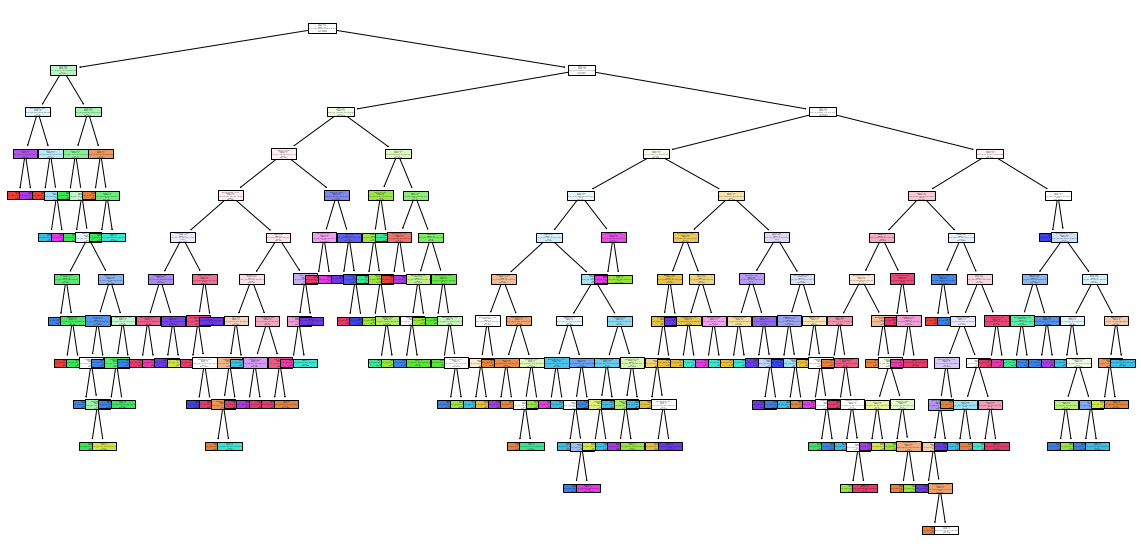

In [ ]:
from sklearn import tree
plt.figure(figsize=(20,10))
fn = X.columns
cn = y.unique()
Tree = tree.plot_tree(dt_new, feature_names=fn, class_names=cn, filled=True)
plt.show()

# Phase 4.2 Bagging Modeling

4.2-1 **Fit the training data to a bagging model**

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import (
    classification_report,
    recall_score,
    precision_score,
    accuracy_score
)
model_bagging = BaggingClassifier(DecisionTreeClassifier(criterion='entropy',max_depth=12,random_state = 2021),
                                  random_state = 2021,n_estimators=50)
model_bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=12,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=2021,

4.2-2 **Visualize the confusion matrix**

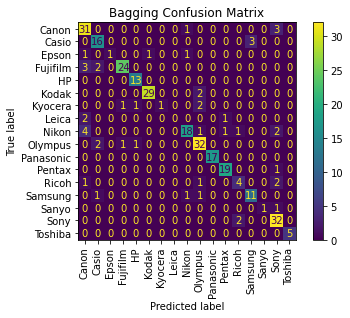

In [ ]:
metrics.plot_confusion_matrix(model_bagging, X_test, y_test)
plt.xticks(rotation=90)
plt.title("Bagging Confusion Matrix")
plt.show()

4.2-3 **Print the accuracy score on the test partition**

In [ ]:
pred_bagging = model_bagging.predict(X_test)
acc_bagging = accuracy_score(y_test, pred_bagging)
print(' Accuracy = ', acc_bagging)

 Accuracy =  0.8410596026490066


4.2-4 **Feature importance**<br>
Since Bagging Classifier can be used with many base estimators, so there is no feature importances implemented.

4.2-5 **Model Optimization: cross validation / regularization & prunnning**

In [ ]:
bag_param = {'bootstrap': [True, False],
             'bootstrap_features': [True, False],    
             'n_estimators': [50,55,60],
             'random_state':[2021]}

bag_grandsearch = GridSearchCV(BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',max_depth=12,random_state = 2021)),
                                                 param_grid=bag_param, n_jobs=5)

# Find the optimized Bagging model
bag_grandsearch.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                               class_weight=None,
                                                                               criterion='entropy',
                                                                               max_depth=12,
                                                                               max_features=None,
                                                                               max_leaf_nodes=None,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=1,
                                                                     

In [ ]:
# Results
print("Optimal parameters to train the model:")
print(bag_grandsearch.best_params_)
print("The mean cross-validated score for the Optimized model:", bag_grandsearch.best_score_)

Optimal parameters to train the model:
{'bootstrap': True, 'bootstrap_features': True, 'n_estimators': 55, 'random_state': 2021}
The mean cross-validated score for the Optimized model: 0.8618642350557245


4.2-6 **Re-model using the optimal parameters and check overfitting**

In [ ]:
model_bagging_new = BaggingClassifier(DecisionTreeClassifier(criterion='entropy',max_depth=10,random_state = 2021),
                                  random_state = 2021,n_estimators=55,bootstrap=True,
                                  bootstrap_features=True)
model_bagging_new.fit(X_train, y_train)

y_predTrain_bagging = model_bagging_new.predict(X_train)
print('Accuracy on the training partition =', metrics.accuracy_score(y_train, y_predTrain_bagging))
y_predNew_bagging = model_bagging_new.predict(X_test)
print('Accuracy on the testing partition=', metrics.accuracy_score(y_test, y_predNew_bagging))
print("No significant overfitting found.")

Accuracy on the training partition = 1.0
Accuracy on the testing partition= 0.890728476821192
No significant overfitting found.


# Phase 4.3: Boosting Modeling 

4.3-1 **Fit the training data to an AdaBoost Model**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
base_est = DecisionTreeClassifier(criterion='entropy',max_depth=12,random_state = 2021)
ada_boost = AdaBoostClassifier(base_est, n_estimators=50, random_state=2021, learning_rate=0.05)
ada_boost.fit(X_train, y_train)



AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=12,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                      

4.3-2 **Visualize the confusion matrix**

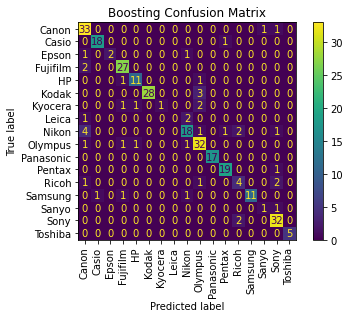

In [ ]:
metrics.plot_confusion_matrix(ada_boost, X_test, y_test)
plt.xticks(rotation=90)
plt.title("Boosting Confusion Matrix")
plt.show()

4.3-3 **Print the accuracy score on the test partition**

In [ ]:
predict_aba = ada_boost.predict(X_test)
acc_aba = accuracy_score(y_test, predict_aba)

print(' Accuracy = ', acc_aba)

 Accuracy =  0.8576158940397351


4.3-4 **Find the most important features in the decision tree for determining toxicity.**

In [ ]:
feature_importances_aba = ada_boost.feature_importances_
features_aba = X_train.columns
FI_aba = pd.DataFrame({'features': features_aba, 'importance': feature_importances_aba})
FI_aba.sort_values(by='importance', ascending=False, inplace=True)
print(FI_aba.head())

                   features  importance
10                    Price    0.651378
5        Normal focus range    0.057631
8   Weight (inc. batteries)    0.053802
9                Dimensions    0.053289
4             Zoom tele (T)    0.051159


4.3-5 **Model Optimization: cross validation / regularization & prunnning**

In [ ]:
boosting_param = { 'n_estimators': [50,55,60],
                   'random_state':[2021],
                   'learning_rate': [0.01,0.02,0.03,0.04,0.05,0.06,0.07]}

boost_grandsearch = GridSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',max_depth=12,random_state = 2021)),
                                                 param_grid=boosting_param, n_jobs=5)

# Find the optimized Boosting model
boost_grandsearch.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='entropy',
                                                                                max_depth=12,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=

In [ ]:
# Results
print("Optimal parameters to train the model:")
print(boost_grandsearch.best_params_)
print("The mean cross-validated score for the Optimized model:", boost_grandsearch.best_score_)

Optimal parameters to train the model:
{'learning_rate': 0.01, 'n_estimators': 50, 'random_state': 2021}
The mean cross-validated score for the Optimized model: 0.7721479229989867


4.3-6 **Re-model using the optimal parameters and check overfitting**

In [ ]:
model_boost_new = AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy',max_depth=10,random_state = 2021),
                                  random_state = 2021,n_estimators=50,learning_rate=0.01)
model_boost_new.fit(X_train, y_train)

y_predTrain_boost = model_boost_new.predict(X_train)
print('Accuracy on the training partition =', metrics.accuracy_score(y_train, y_predTrain_boost))
y_predNew_boost = model_boost_new.predict(X_test)
print('Accuracy on the testing partition=', metrics.accuracy_score(y_test, y_predNew_boost))
print("No significant overfitting found.")

Accuracy on the training partition = 1.0
Accuracy on the testing partition= 0.8443708609271523
No significant overfitting found.


# Phase 5: Performance Summary and Conclusion

5-1 **Comparison**

Decision Tree Model:<br>
*   The mean cross-validated score for the Optimized model: 0.7721479229989867
*   Accuracy score on the testing partition: 0.8278145695364238

Bagging Model (with Decision Tree as base estimator):<br>
*   The mean cross-validated score for the Optimized model: 0.8618642350557245
*   Accuracy score on the testing partition: 0.890728476821192

AdaBoost Model (with Decision Tree as base estimator):<br>
*   The mean cross-validated score for the Optimized model: 0.7721479229989867
*   Accuracy score on the testing partition: 0.8443708609271523



> The Bagging Model appears to have the best performance with highest accuracy!



5-2 **Benchmark Model & Baseline Accuracy**


In [ ]:
from sklearn.dummy import DummyClassifier
# Constant Strategy
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)
dummy_y_pred = dummy_clf.predict(X_test)

print("The baseline accuracy is", accuracy_score(y_test, dummy_y_pred))


The baseline accuracy is 0.11920529801324503




> The Bagging Model sufficiently outperformed the Benchmark Model we created.



5-3 **Conclusion**<br>
Thus, based on the comprehensive analysis above, it is reasonable to say that Bagging Modeling with a base estimator of Decision Tree have the best performance among all.